In [5]:
import csv
import imageio
import numpy
import matplotlib.pyplot
%matplotlib inline
import scipy.special

In [3]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, wih, who, typen=False):  # Инициализация сети
        # Количество узлов в слоях
        self.innodes = inputnodes
        self.hidnodes = hiddennodes
        self.outnodes = outputnodes

        self.learn = learningrate # Коэффицент обучения
        
        # Генерация весовых коэффицентов
        if typen == False:
            self.wih = numpy.random.normal(0.0, pow(self.hidnodes, -0.5), (self.hidnodes, self.innodes)) 
            self.who = numpy.random.normal(0.0, pow(self.outnodes, -0.5), (self.outnodes, self.hidnodes))
        else:
            self.wih = wih
            self.who = who

        self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, inputs_list, targets_list): # Тренировка сети
        targets = numpy.array(targets_list, ndmin=2).T
        
        inputs = numpy.array(inputs_list, ndmin=2).T       
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)

        self.who += self.learn * numpy.dot((output_errors * final_outputs * (1 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.learn * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), numpy.transpose(inputs))


    def query(self, inputs_list): # Опрос сети
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs) 

        return final_outputs
    
    def get_w(self, n):
        if n == 'wih':
            return self.wih
        elif n == 'who':
            return self.who

In [1]:
# Первая нейросеть для определения весов
inputnodes = 784
hiddennodes = 500
outputnodes = 10
learningrate = 0.2
wih_f = 0

In [6]:
NeuraFirst = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate, wih_f, wih_f, typen=False)

In [8]:
with open('mnist_train.csv', 'r') as file_train:
    train_data_list = file_train.readlines()

epochs = 5
for e in range(epochs):
    for record in train_data_list:
        all_values = record.split(',')
        image_array = numpy.asfarray(all_values[1:]) 
        inputs = (image_array / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(outputnodes) + 0.01
        targets[int(all_values[0])] = 0.99
        NeuraFirst.train(inputs, targets)
    print('Эпоха', e, 'завершена')
print('Обучение завершено')

Эпоха 0 завершена
Эпоха 1 завершена
Эпоха 2 завершена
Эпоха 3 завершена
Эпоха 4 завершена
Обучение завершено


In [8]:
# Проверка эффективности сети
with open('mnist_test.csv', 'r') as file_test:
    test_data_list = file_test.readlines()
all_test_values = test_data_list[0].split(',')
image_test_array = numpy.asfarray(all_test_values[1:])

scorecard = []
for test_record in test_data_list:
    all_values = test_record.split(',')
    correct_label = int(all_values[0]) 

    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = NeuraFirst.query(inputs)
    label = numpy.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
#print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() / scorecard_array.size)

эффективность =  0.9722


In [11]:
# Сохранить тренировку сети
wih = NeuraFirst.get_w('wih')
who = NeuraFirst.get_w('who')
numpy.save('wih.npy', wih)
numpy.save('who.npy', who)

In [7]:
# Основная нейросеть
wih = numpy.load('wih.npy')
who = numpy.load('who.npy')
Neura = neuralNetwork(inputnodes, hiddennodes, outputnodes, learningrate, wih, who, typen=True)

6    70.98%


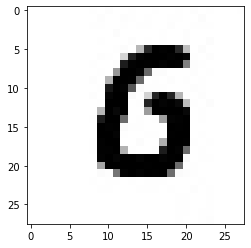

In [100]:
# Определение числа
img = (imageio.imread('img.jpg', as_gray=True))
img = numpy.array(img)
inputs = ((img / 255.0 * 0.99) + 0.01)
inpu = []
for i in inputs:
    for j in i:
        inpu.append(j)
inputs = numpy.asfarray(inpu)
outputs = Neura.query(inputs)
percent_dict = {}
n = 0
for i in outputs:
    percent = ("%.2f") % (i[0] / outputs.sum() * 100)
    #print(percent)
    if float(percent) >= 30:
        percent_dict[n] = percent
    n += 1       
dict(sorted(percent_dict.items(), key=lambda item: item[1]))
for key in percent_dict.keys():
    print(key, '  ', percent_dict[key] + '%')

matplotlib.pyplot.imshow(img, cmap='Greys', interpolation=None)

In [90]:
# Добавить тренировочные данные
# ПЕРЕД ЗАПУСКОМ ОБНОВИТЬ ПЕРЕМЕННУЮ right_value
right_value = input('Введите истинное значение >>> ')

with open("mnist_train.csv", mode="a", newline='') as w_file:
    file_writer = csv.writer(w_file, delimiter = ",")
    inpu = [right_value]
    for i in img:
        for j in i:
            inpu.append(int(j))    
    file_writer.writerow(inpu) 
print('Число добавленно в тренировочный набор')
   

Введите истинное значение >>> 6
Число добавленно в тренировочный набор
